Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [156]:
#step 1
import pandas as pd
import numpy as np
#step2&3
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
#step4
users_age = users[["occupation","age"]]
users_age.head()
users_age.groupby("occupation").mean()

In [158]:
#step5
Males=users.groupby(['occupation','gender']).gender.count()/users.groupby('occupation').gender.count()*100
Males.sort_values(ascending=False).xs('M',level=1)

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [159]:
#step6
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [160]:
#step7
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [162]:
#step8
go = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
Total_Count = users.groupby(['occupation']).count()
og = go.div(Total_Count, level = "occupation")
og.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

QUESTION 2:
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [147]:
#Question2
#step1
import pandas as pd
import numpy as np

In [35]:
#step2&3
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [30]:
#step4
euro12_Goals = euro12["Goals"]
euro12_Goals.head()


0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [42]:
#step5
euro12["Team"].nunique()

16

In [28]:
#step6
len(euro12.columns)

35

In [36]:
#step7
discipline=euro12[["Team","Yellow Cards","Red Cards"]]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [39]:
#step8
discipline.sort_values(by=["Red Cards","Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [43]:
#step9
mean_Yellow_Card = discipline[["Team","Yellow Cards"]]
mean_Yellow_Card.groupby("Team").mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [45]:
#step10
euro12[["Goals","Team"]].loc[(euro12["Goals"]>6)]

,Goals,Team
5,10,Germany
13,12,Spain


In [49]:
#step11
euro12["Team"].loc[euro12["Team"].str.startswith("G",na=False)]

5    Germany
6     Greece
Name: Team, dtype: object

In [51]:
#step12
euro12.iloc[:,0:5]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy
0,Croatia,4,13,12,51.9%
1,Czech Republic,4,13,18,41.9%
2,Denmark,4,10,10,50.0%
3,England,5,11,18,50.0%
4,France,3,22,24,37.9%
5,Germany,10,32,32,47.8%
6,Greece,5,8,18,30.7%
7,Italy,6,34,45,43.0%
8,Netherlands,2,12,36,25.0%
9,Poland,2,15,23,39.4%


In [248]:
#step13
euro12.tail(-3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16


In [152]:
#step14
euro12_filter = euro12[["Team","Shooting Accuracy"]].set_index(["Team"])
euro12_filter.head()
euro12_filter.loc[["England","Italy","Russia"]]

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%


Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [164]:
#step1
import pandas as pd
import numpy as py
#step2
s1 = pd.Series(np.random.randint(1,5,100))
s2 = pd.Series(np.random.randint(1,4,100))
s3 = pd.Series(np.random.randint(10000,30000,100))

In [165]:
#step3
df = pd.concat([s1,s2,s3],axis=1)
df.head()

,0,1,2
0,3,2,15169
1,4,3,21902
2,4,1,13594
3,1,3,15032
4,1,3,18667


In [166]:
#step4
df.columns = ['bedrs','bathrs','price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,15169
1,4,3,21902
2,4,1,13594
3,1,3,15032
4,1,3,18667


In [170]:
#step5
bigcolumn = pd.concat([s1,s2,s3],axis=0)
#step6
bigcolumn

0         3
1         4
2         4
3         1
4         1
      ...  
95    28059
96    17595
97    21642
98    19003
99    25258
Length: 300, dtype: int32

In [171]:
#step7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          4
2          4
3          1
4          1
       ...  
295    28059
296    17595
297    21642
298    19003
299    25258
Length: 300, dtype: int32

Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [305]:
#Question 4
#step1
import pandas as pd
import numpy as py
import datetime as dt

#step2&3
data = pd.read_csv(r"C:\Users\yashe\Downloads\wind.txt", delim_whitespace=True)
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [306]:
#step4
data["Date"] = py.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 1961-01-01  

In [307]:
#step5
ndata = data.set_index("Date")
print(ndata.index.astype("datetime64[ns]"))

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


In [309]:
#step6
m=ndata.isnull().values.ravel().sum()
print(m)

31


In [310]:
#step7
nmv=ndata.count().sum()
print(nmv)

78857


In [311]:
#step8
mws = ndata.mean()
print(mws.mean())

10.227982360836924


In [315]:
#step9
def statistics(x):
    x = pd.Series(x)
    minimum = x.min()
    maximum = x.max()
    mean = x.mean()
    sd = x.std()
    result = [minimum,maximum,mean,sd]
    index = ["Min","Max","Mean","Std"]
    result = pd.Series(result,index=index)
    return result
ls = ndata.apply(statistics)
print(ls)

            RPT        VAL        ROS        KIL        SHA        BIR  \
Min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
Max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
Mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
Std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
Min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
Max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
Mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
Std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [316]:
#step10
ds = ndata.apply(statistics,axis=1)
print(ds)

             Min    Max       Mean       Std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [317]:
#step11
avgJan = ndata[ndata.index.month == 1].mean()
print(avgJan)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [318]:
#step12
y=ndata.resample('A').mean()
print(y)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [319]:
#step13
m=ndata.resample('M').mean()
print(m)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [320]:
#step14
w=ndata.resample('W').mean()
print(w)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [321]:
#step15
fy = ndata[ndata.index.year == 1961]
stats = ndata.resample('W').mean().apply(lambda x: x.describe())
print(stats)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [172]:
#step1
import pandas as pd
import numpy as py

#step2&3
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
#step4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [173]:
#step5
len(chipo)

4622

In [174]:
#step6
len(chipo.columns)

5

In [177]:
#step7
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [178]:
#step8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [236]:
#step9&10
o=chipo[["item_name","order_id"]].groupby('item_name').count().sort_values(by="order_id",ascending=False)
o.head(1)

,order_id
item_name,
Chicken Bowl,726


In [238]:
#step11
oc=chipo[["item_name","order_id","choice_description"]].groupby('item_name').count().sort_values(by="order_id",ascending=False)
oc.head(1)

,order_id,choice_description
item_name,,
Chicken Bowl,726,726


In [289]:
#step12
chipo[["quantity"]].sum()

quantity    4972
dtype: int64

In [323]:
#step13

chipo['item_price']=pd.to_numeric(chipo['item_price'],errors='coerce')
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None


In [324]:
#step13
print(chipo[['item_price']].dtypes)

item_price    float64
dtype: object


In [325]:
#step13
chipo['item_price'].apply(lambda x: object if isinstance(x, float) else x)

0       <class 'object'>
1       <class 'object'>
2       <class 'object'>
3       <class 'object'>
4       <class 'object'>
              ...       
4617    <class 'object'>
4618    <class 'object'>
4619    <class 'object'>
4620    <class 'object'>
4621    <class 'object'>
Name: item_price, Length: 4622, dtype: object

In [287]:
#step14
ts = pd.to_numeric(chipo['item_price']).sum()
ts

34500.16

In [282]:
#step15
to = chipo['order_id'].nunique()
to

1834

In [328]:
#step16
avg = chipo[["order_id","item_price"]]
avg.groupby('order_id').mean()

,item_price
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


In [284]:
#step17
diff = chipo['item_name'].nunique()
diff

50

Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [91]:
#question 6
import matplotlib.pyplot as plt
%matplotlib inline
usa= pd.read_csv(r"C:\Users\yashe\Downloads\us-marriages-divorces-1867-2014.csv",sep=",")
usa.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


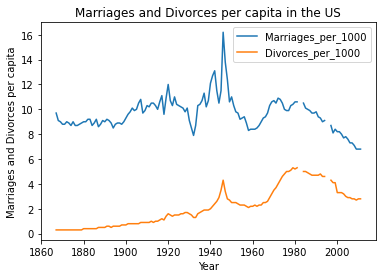

In [99]:
x_axis = usa[["Year"]]
#print(x_axis)
fig, ax = plt.subplots()
ax.plot(x_axis,usa[["Marriages_per_1000"]])
ax.plot(x_axis,usa[["Divorces_per_1000"]])
ax.set_title('Marriages and Divorces per capita in the US')
ax.set_xlabel('Year')
ax.set_ylabel('Marriages and Divorces per capita')
ax.legend(usa[["Marriages_per_1000","Divorces_per_1000"]])

Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

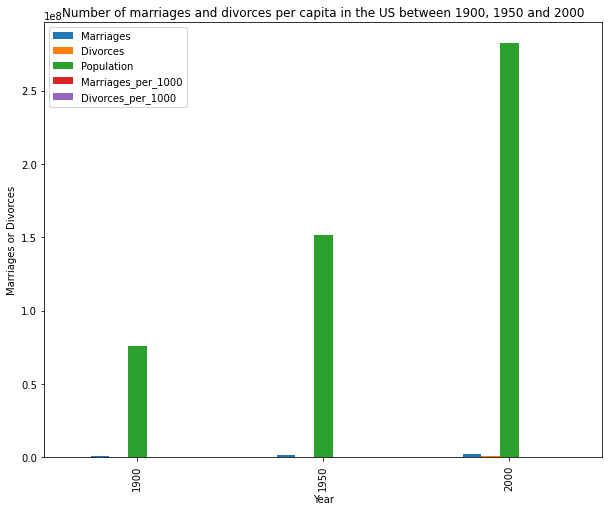

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
q=usa.loc[(usa['Year']==1900) | (usa['Year']==1950) | (usa['Year']==2000)]
barchart = q.groupby("Year").sum().plot.bar(figsize=(10,8))
barchart.set_title('Number of marriages and divorces per capita in the US between 1900, 1950 and 2000')
barchart.set_xlabel('Year')
barchart.set_ylabel('Marriages or Divorces')
barchart.legend()

Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
actor = pd.read_csv(r"C:\Users\yashe\Downloads\actor_kill_counts.csv")
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


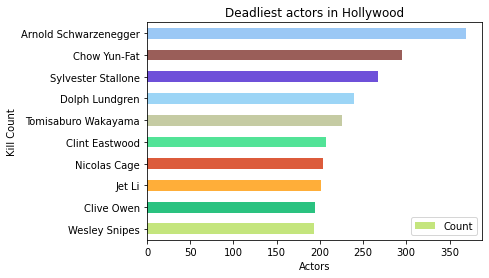

In [115]:
actor_x_axis=actor[["Actor"]]
colors=['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5','#0BBC66',
           '#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#43C711','#A4CCD9','#AFF373','#392D6A','#792D86','#9CA54B',
           '#7F03BE','#D5EC95','#FCE2A5']
bar = actor.groupby("Actor").Count.mean().sort_values().plot.barh(color=colors)
bar.set_title('Deadliest actors in Hollywood')
bar.set_xlabel('Actors')
bar.set_ylabel('Kill Count')
bar.legend()

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [116]:
roman = pd.read_csv(r"C:\Users\yashe\Downloads\roman-emperor-reigns.csv")
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


<AxesSubplot:ylabel='Emperor'>

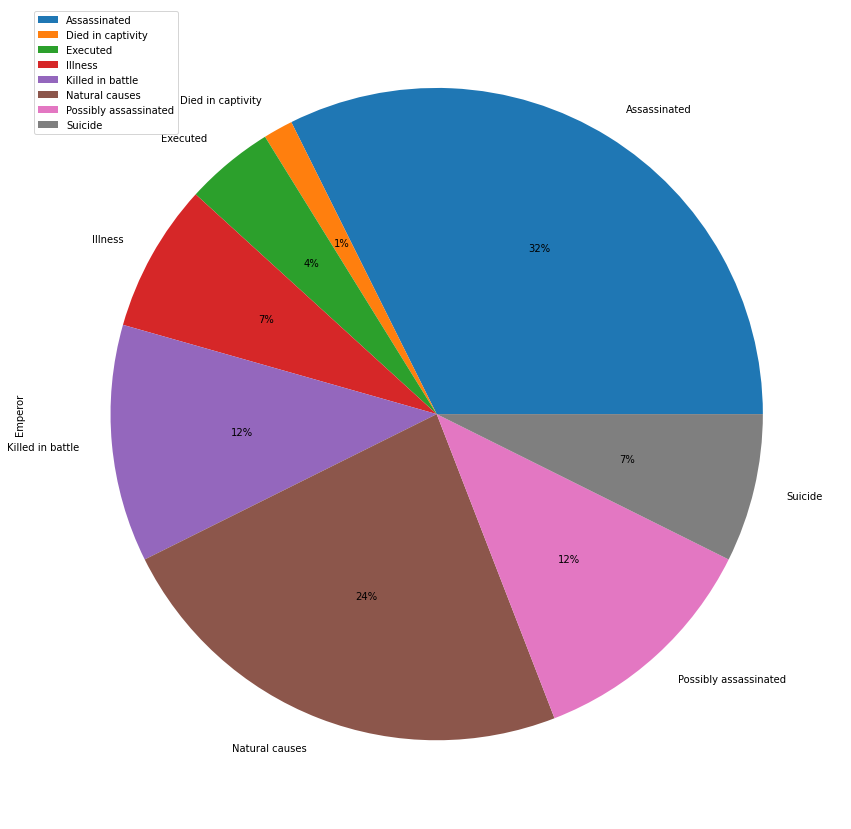

In [134]:
assassin = roman[["Emperor","Cause_of_Death"]].groupby("Cause_of_Death").count()
total = assassin[["Emperor"]].sum()
assassin.plot.pie(y="Emperor",figsize=(20,15),autopct='%1.0f%%')

Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [139]:
import seaborn as sns
arcade = pd.read_csv(r'C:\Users\yashe\Downloads\arcade-revenue-vs-cs-doctorates.csv')
arcade.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

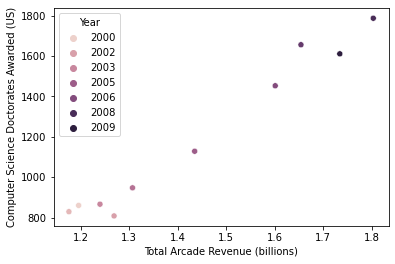

In [146]:
plot=sns.scatterplot(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)",hue='Year',data=arcade)